In [1]:
'''Code to view category prevalence'''
import os
import pandas as pd

data_dir = '/cluster/tufts/hugheslab/eharve06/HAM10000'
df = pd.read_csv(os.path.join(data_dir, 'metadata'))
df.dx.value_counts()/df.shape[0]

nv       0.669496
mel      0.111133
bkl      0.109735
bcc      0.051323
akiec    0.032651
vasc     0.014179
df       0.011483
Name: dx, dtype: float64

In [2]:
'''Code to create labels.csv'''
def label_to_category(label, categories):
    if label not in categories: return [0]
    else: return [categories.index(label)+1]

data_dir = '/cluster/tufts/hugheslab/eharve06/HAM10000'
df = pd.read_csv(os.path.join(data_dir, 'metadata'))
categories = ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']
categories = ['bkl', 'nv', 'mel'] # categories based off prevalence
df['label'] = df['dx'].apply(lambda label: label_to_category(label, categories))
df['path'] = df['image_id'].apply(lambda image_id: os.path.join(data_dir, 'images/{}.jpg'.format(image_id)))
temp_df = df[['lesion_id', 'label', 'path']].set_index('lesion_id')
temp_df.to_csv(os.path.join(data_dir, 'labels.csv'))
temp_df.head()

,label,path
lesion_id,,
HAM_0000118,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0000118,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0002730,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0002730,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0001466,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...


In [3]:
import sys
sys.path.append('../src/')
import numpy as np

def load_experiment(path):
    df = pd.read_csv(path, index_col='Unnamed: 0')
    if 'train_auroc' in df.columns:
        df.train_auroc = df.train_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
        df.val_auroc = df.val_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
        df.test_auroc = df.test_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    if 'train_BA' in df.columns:
        df.train_BA = df.train_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
        df.val_BA = df.val_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
        df.test_BA = df.test_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    if 'lrs' in df.columns:
        df.lrs = df.lrs.apply(lambda string: np.fromstring(string[1:-1], sep=', '))
    return df

df = load_experiment('/cluster/home/eharve06/bdl-transfer-learning/checkpoints/model_history.csv')
df.tail()

,epoch,train_loss,train_auroc,val_loss,val_auroc,test_loss,test_auroc,lrs
130,131,0.000403,"[1.0, 1.0, 0.99959205, 1.0]",2.633574,"[0.9368984, 0.72916667, 0.90909091, 0.86395349]",2.817857,"[0.92790698, 0.76884921, 0.82470703, 0.81162791]","[0.1720331442443645, 0.17093819666938795, 0.16..."
131,132,0.000419,"[1.0, 1.0, 0.99951179, 1.0]",2.610447,"[0.93903743, 0.73115079, 0.90957191, 0.86046512]",2.811680,"[0.92790698, 0.76785714, 0.82470703, 0.80697674]","[0.15726691841425466, 0.15619688432867784, 0.1..."
132,133,0.000408,"[1.0, 1.0, 0.99950511, 1.0]",2.624450,"[0.93796791, 0.73214286, 0.90812891, 0.8627907]",2.846504,"[0.93139535, 0.76686508, 0.82617188, 0.80930233]","[0.14286693635647366, 0.14182604179606845, 0.1..."
133,134,0.000383,"[1.0, 1.0, 0.99963217, 1.0]",2.665064,"[0.94010695, 0.73015873, 0.90812891, 0.86046512]",2.844153,"[0.93023256, 0.76289683, 0.82568359, 0.80930233]","[0.12889006994090998, 0.1278824258566324, 0.12..."
134,135,0.000391,"[1.0, 1.0, 0.99959873, 1.0]",2.643428,"[0.94010695, 0.73511905, 0.90716691, 0.86627907]",2.829325,"[0.92906977, 0.76884921, 0.82714844, 0.80813953]","[0.11539151996747046, 0.11442110598950511, 0.1..."


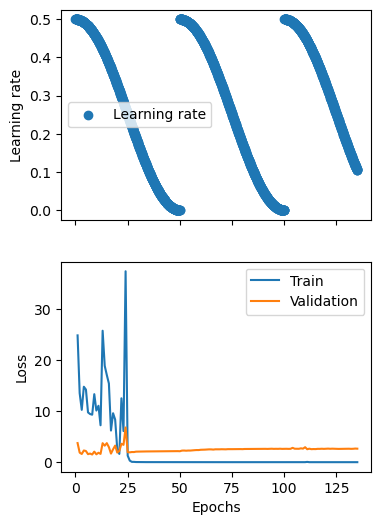

In [4]:
import matplotlib.pyplot as plt
lrs = np.array(df.lrs.to_list()).ravel()
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(4, 6), sharex=True)
np.array(axs).flatten()[0]\
.scatter(np.linspace(0, np.max(df.epoch.to_list()), len(lrs)), lrs, label='Learning rate')
np.array(axs).flatten()[0]\
.set_ylabel('Learning rate')
np.array(axs).flatten()[0]\
.legend()
np.array(axs).flatten()[1]\
.plot(df.epoch.to_list(), df.train_loss.to_list(), label='Train')
np.array(axs).flatten()[1]\
.plot(df.epoch.to_list(), df.val_loss.to_list(), label='Validation')
np.array(axs).flatten()[1]\
.set_ylabel('Loss')
np.array(axs).flatten()[1]\
.legend()
np.array(axs).flatten()[-1]\
.set_xlabel('Epochs')
plt.show()

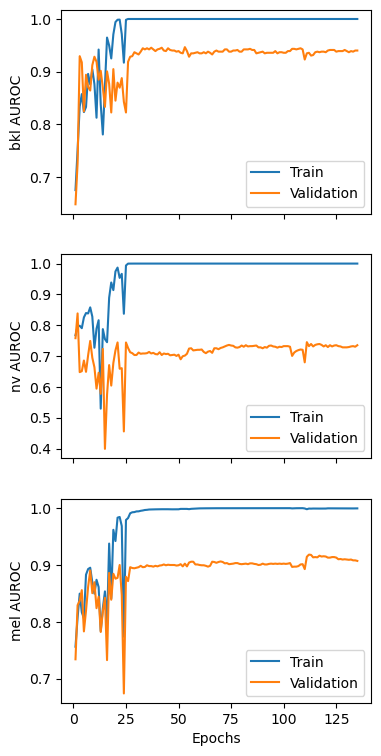

In [5]:
labels = ['bkl', 'nv', 'mel']
num_labels = len(labels)
fig, axs = plt.subplots(ncols=1, nrows=num_labels, figsize=(4, num_labels*3), sharex=True)
for label_index in range(num_labels):
    np.array(axs).flatten()[label_index]\
    .plot(df.epoch.to_list(), np.array(df.train_auroc.to_list())[:,label_index], label='Train')
    np.array(axs).flatten()[label_index]\
    .plot(df.epoch.to_list(), np.array(df.val_auroc.to_list())[:,label_index], label='Validation')
    np.array(axs).flatten()[label_index]\
    .set_ylabel('{} AUROC'.format(labels[label_index]))
    np.array(axs).flatten()[label_index]\
    .legend()
np.array(axs).flatten()[-1]\
.set_xlabel('Epochs')
plt.show()